In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from urllib.parse import urlparse
from tld import get_tld, is_tld

In [2]:
df = pd.read›_csv('./dataset/dataset_zenodo_fullset.csv')
df.head(20)

,url,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,number_of_forms,number_of_forms_with_get_method,number_of_forms_with_post_method,number_of_applet,number_of_embed,number_of_frame,number_input_password,result
0,http://www.zhuravlik32.net/,114,2,9,1,0,0,0,2,0,1,0,0,0,0,0,0,0
1,http://purchasereturn.info/qs/banks/Desjardins...,26,3,19,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,http://0441ecc.wcomhost.com/trust2/customer_ce...,7,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1
3,http://paypal-girlshop.com/signin/,28,2,4,0,0,0,0,4,0,1,0,1,0,0,0,1,1
4,http://pagesperso-orange.fr/semezies/,16,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,https://maraby.org/lemco/atopo,8,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,http://4matic2018.000webhostapp.com/ludo/DHL/u...,10,1,5,0,0,0,0,0,0,1,0,0,0,0,0,1,1
7,http://iriz.hanazono.ac.jp/zen_centers/centers...,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,http://utenzabloccata.com/sella/,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,http://townsvilleoutriggers.org.au/uploads/pay...,23,1,3,0,0,0,0,2,0,1,0,1,0,0,0,1,1


,url,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,http://www.zhuravlik32.net/,114,2,9,1,0,0,0,2,0,...,0,0,0,1,1,0,2,19,0,0
1,http://purchasereturn.info/qs/banks/Desjardins...,26,3,19,0,0,0,0,0,0,...,0,0,0,1,1,0,11,47,0,0
2,http://0441ecc.wcomhost.com/trust2/customer_ce...,7,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,10,65,1,0
3,http://paypal-girlshop.com/signin/,28,2,4,0,0,0,0,4,0,...,0,0,0,1,1,0,0,27,0,0
4,http://pagesperso-orange.fr/semezies/,16,2,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,30,0,0
5,https://maraby.org/lemco/atopo,8,3,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,24,0,0
6,http://4matic2018.000webhostapp.com/ludo/DHL/u...,10,1,5,0,0,0,0,0,0,...,0,0,0,1,1,0,8,33,0,0
7,http://iriz.hanazono.ac.jp/zen_centers/centers...,2,3,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,52,0,0
8,http://utenzabloccata.com/sella/,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,26,0,0
9,http://townsvilleoutriggers.org.au/uploads/pay...,23,1,3,0,0,0,0,2,0,...,0,0,0,1,1,0,1,62,0,0


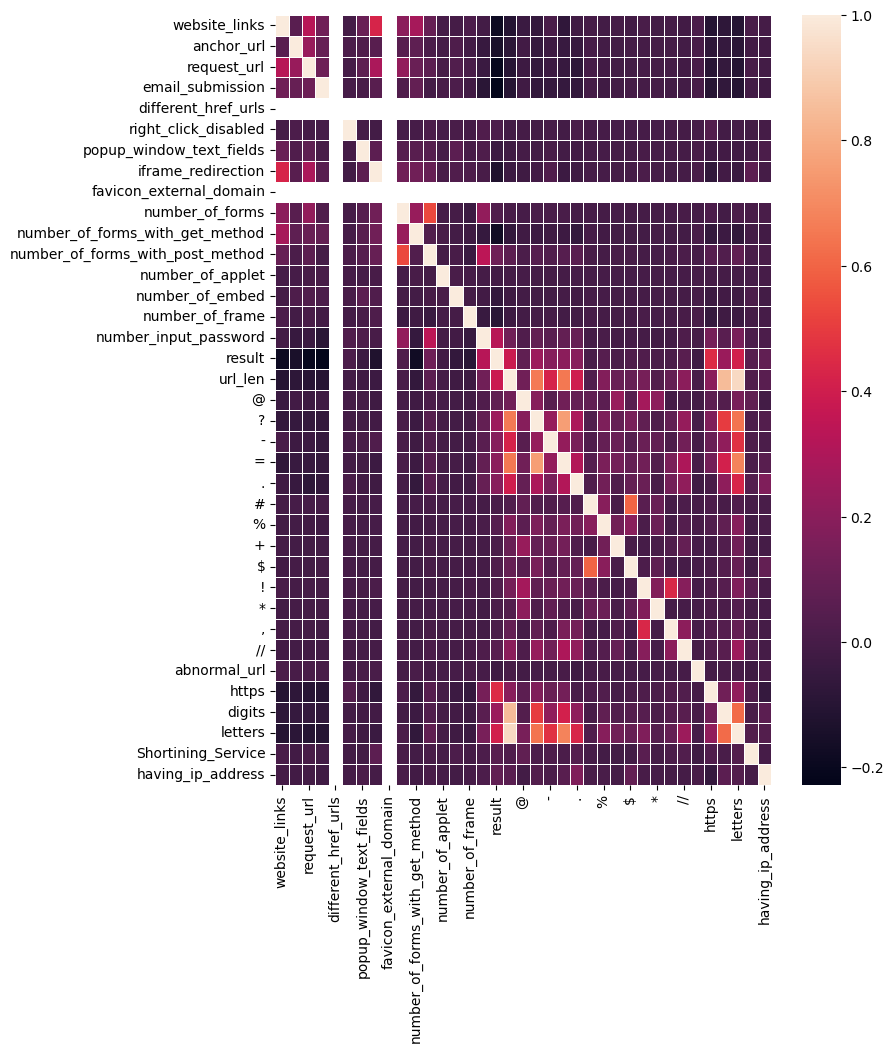

In [3]:
df['url_len'] = df['url'].apply(lambda x: len(str(x)))


def process_tld(url):
    try:
        # Extract the top level domain (TLD) from the URL given
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

df['domain'] = df['url'].apply(lambda i: process_tld(i))
df.head(20)

feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df[a] = df['url'].apply(lambda i: i.count(a))


def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))  

def httpSecure(url):
    htp = urlparse(url).scheme #It supports the following URL schemes: file , ftp , gopher , hdl , 
                               #http , https ... from urllib.parse
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['https'] = df['url'].apply(lambda i: httpSecure(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['digits']= df['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['letters']= df['url'].apply(lambda i: letter_count(i))

def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['Shortining_Service'] = df['url'].apply(lambda x: Shortining_Service(x))

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
df['having_ip_address'] = df['url'].apply(lambda i: having_ip_address(i))
df.head(20)
df['having_ip_address'].value_counts()

plt.figure(figsize=(8, 10))
sns.heatmap(df.corr(), linewidths=.5)

df.head(10)

In [4]:
df.to_csv('./dataset/website_content.csv', index=False)  